In [1]:
pip install tensorflow


     ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
     --------------------------------------- 2.2/376.9 MB 46.6 MB/s eta 0:00:09
     --------------------------------------- 4.7/376.9 MB 50.3 MB/s eta 0:00:08
      -------------------------------------- 8.5/376.9 MB 60.3 MB/s eta 0:00:07
     - ------------------------------------ 11.7/376.9 MB 65.6 MB/s eta 0:00:06
     - ------------------------------------ 14.6/376.9 MB 65.6 MB/s eta 0:00:06
     - ------------------------------------ 17.6/376.9 MB 65.2 MB/s eta 0:00:06
     - ------------------------------------ 19.8/376.9 MB 59.5 MB/s eta 0:00:07
     -- ----------------------------------- 21.1/376.9 MB 54.4 MB/s eta 0:00:07
     -- ----------------------------------- 22.5/376.9 MB 43.7 MB/s eta 0:00:09
     -- ----------------------------------- 24.9/376.9 MB 43.7 MB/s eta 0:00:09
     -- ----------------------------------- 26.5/376.9 MB 38.5 MB/s eta 0:00:10
     -- ----------------------------------- 27.


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install imblearn

     ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
     --------------- ---------------------- 102.4/258.0 kB 5.8 MB/s eta 0:00:01
     -------------------------------------- 258.0/258.0 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#### Loding the data set

In [4]:
ccf= pd.read_csv("creditcard.csv" , header = 0) # Load the credit card dataset into a Pandas DataFrame

In [5]:
ccf.head() # Display the first few rows of the credit card dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
ccf.describe() # Generate descriptive statistics of the credit card dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
ccf.isnull().sum().max() # Find the maximum number of missing values in the DataFrame

0

In [8]:
ccf.columns # Print the column names of the DataFrame

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#print the percentage of fraudulent and non-fraudulent transactions 
print('No Frauds', round(ccf['Class'].value_counts()[0]/len(ccf) * 100,2), '% of the dataset')
print('Frauds', round(ccf['Class'].value_counts()[1]/len(ccf) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


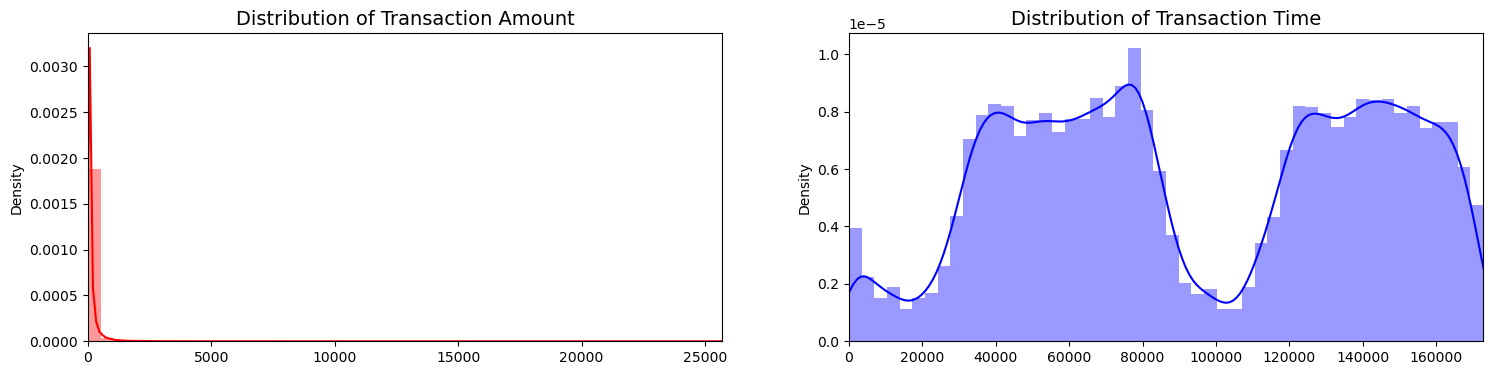

In [10]:
# Create subplots with 1 row and 2 columns, set figure size
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Extract 'Amount' and 'Time' values from the credit card dataset
amount_val = ccf['Amount'].values
time_val = ccf['Time'].values

# Plot distribution of transaction amount
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot distribution of transaction time
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# Show the plots
plt.show()


#### I. Preprocessing
a) Scaling and Distributing
b) Splitting the Data

In [11]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

# Initialize StandardScaler and RobustScaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# Scale the 'Amount' column using RobustScaler and create a new column 'scaled_amount'
ccf['scaled_amount'] = rob_scaler.fit_transform(ccf['Amount'].values.reshape(-1,1))

# Scale the 'Time' column using RobustScaler and create a new column 'scaled_time'
ccf['scaled_time'] = rob_scaler.fit_transform(ccf['Time'].values.reshape(-1,1))

# Drop the original 'Time' and 'Amount' columns
ccf.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
ccf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


#### a) Scaling and Distributing

In [13]:

# Extracting the 'scaled_amount' and 'scaled_time' columns from the dataframe 'ccf'
scaled_amount = ccf['scaled_amount']
scaled_time = ccf['scaled_time']

# Dropping the 'scaled_amount' and 'scaled_time' columns from the dataframe 'ccf'
# axis=1 indicates columns
# inplace=True modifies the dataframe 'ccf' in place without returning a new dataframe
ccf.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserting the 'scaled_amount' column back to index 0 of the dataframe 'ccf'
# This will shift the existing columns to the right
ccf.insert(0, 'scaled_amount', scaled_amount)

# Inserting the 'scaled_time' column back to index 1 of the dataframe 'ccf'
# This will shift the existing columns to the right again
ccf.insert(1, 'scaled_time', scaled_time)

# Printing the first few rows of the modified dataframe 'ccf' to verify the changes
ccf.head()




,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Spliting the data

In [14]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Printing the distribution of the classes in the dataset
print('No Frauds', round(ccf['Class'].value_counts()[0]/len(ccf) * 100,2), '% of the dataset')
print('Frauds', round(ccf['Class'].value_counts()[1]/len(ccf) * 100,2), '% of the dataset')

# Separating features (X) and target variable (y)
X = ccf.drop('Class', axis=1)
y = ccf['Class']

# Splitting the data using Stratified K-Folds cross-validator
# StratifiedKFold preserves the percentage of samples for each class
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Looping through the splits generated by StratifiedKFold
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    # Assigning the data for training and testing from the split indices
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Converting data to arrays
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Checking the distribution of labels in the training and testing sets
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

# Printing the label distributions
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


##### Random Under-Sampling:
In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [15]:
# Shuffle the entire dataset 'ccf'
ccf = ccf.sample(frac=1)

# Select all rows where the Class is equal to 1, indicating fraud transactions
fraud_ccf = ccf.loc[ccf['Class'] == 1]

# Select the first 492 rows where the Class is equal to 0, indicating non-fraud transactions
non_fraud_ccf = ccf.loc[ccf['Class'] == 0][:492]

# Concatenate the fraud and non-fraud dataframes to create a new dataframe with balanced classes
normal_distributed_ccf = pd.concat([fraud_ccf, non_fraud_ccf])

# Shuffle the rows of the new dataframe to avoid any inherent order
# random_state=42 ensures reproducibility of the shuffling
new_ccf = normal_distributed_ccf.sample(frac=1, random_state=42)

# Display the first few rows of the new dataframe
new_ccf.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
64049,1.296025,-0.395846,-1.300971,-0.279427,-0.186270,-1.486163,-0.066318,-1.345965,0.618943,-0.080586,...,-0.137039,-0.227555,-0.062947,0.069030,0.398849,-0.953785,0.695215,0.269566,-0.056294,0
272521,-0.135401,0.945030,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,...,-0.475126,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,1
16420,-0.307413,-0.668499,1.191886,-0.007598,0.785642,2.396843,0.028178,1.689418,-0.785705,0.493633,...,-0.156970,-0.047625,0.170842,-0.347872,-1.358547,0.799096,0.304535,0.039020,-0.001939,0
154676,-0.275554,0.209706,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,...,0.529557,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,1
150715,-0.148117,0.108942,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,...,0.208879,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,1


#### Equally Distributing and Correlating:
Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


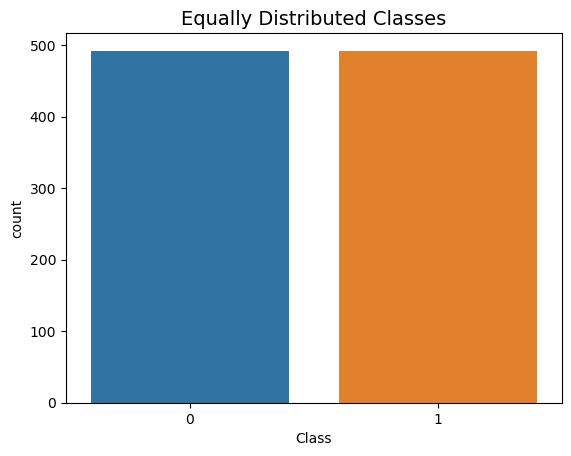

In [16]:
# Importing necessary visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Printing the distribution of classes in the subsample dataset
print('Distribution of the Classes in the subsample dataset')
print(new_ccf['Class'].value_counts()/len(new_ccf))

# Creating a countplot to visualize the distribution of classes
# 'x' specifies the column to plot on the x-axis
# 'data' specifies the dataframe to use
# Using the default color palette provided by Seaborn
sns.countplot(x='Class', data=new_ccf)

# Adding a title to the plot
plt.title('Equally Distributed Classes', fontsize=14)

# Displaying the plot
plt.show()



##### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

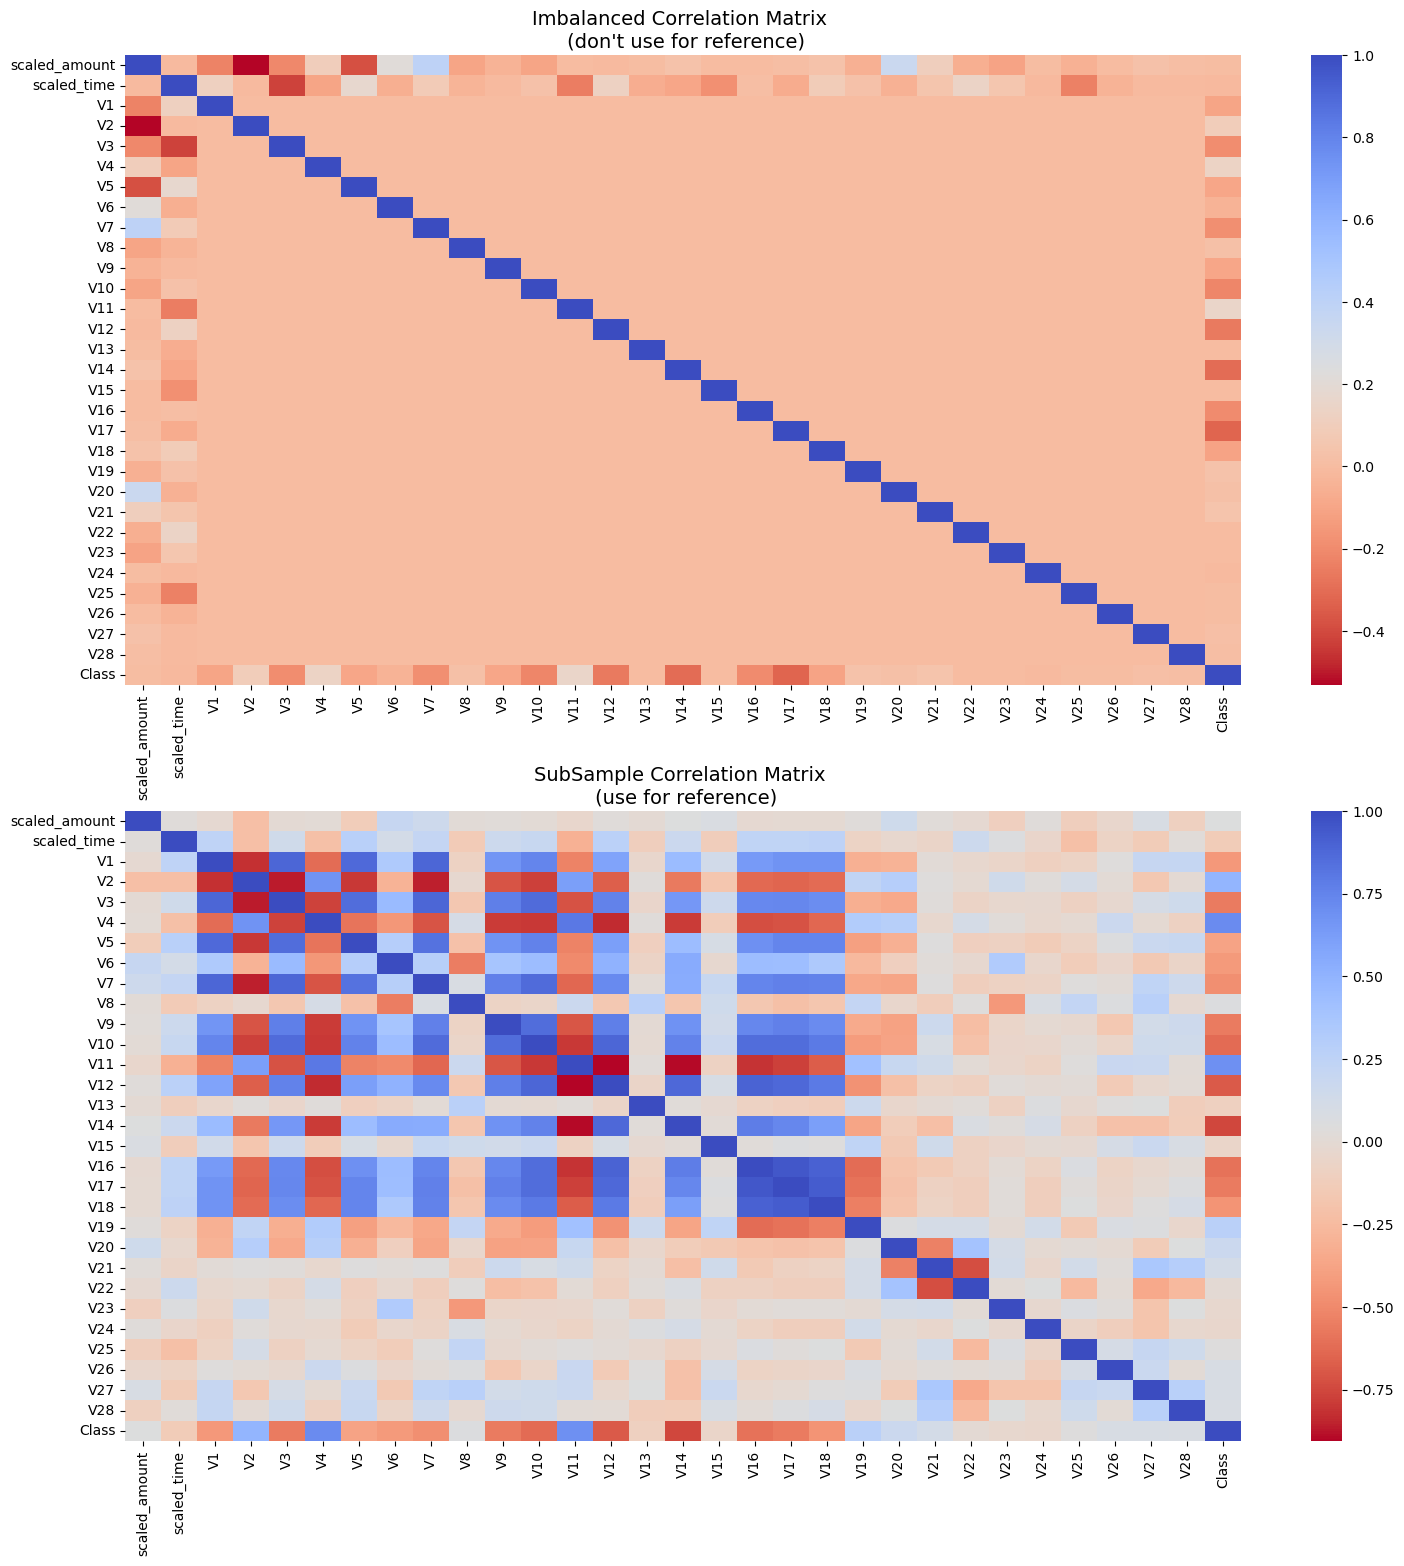

In [17]:
#Correlation Matrices

# Create subplots for displaying correlation matrices side by side
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,18))

# Entire DataFrame Correlation Matrix
# Calculate the correlation matrix for the entire dataframe 'ccf'
corr = ccf.corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
# Set title for the first subplot
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Subsample Correlation Matrix
# Calculate the correlation matrix for the subsampled dataframe 'new_ccf'
sub_sample_corr = new_ccf.corr()
# Plot the subsampled correlation matrix as a heatmap
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
# Set title for the second subplot
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

# Display the subplots
plt.show()


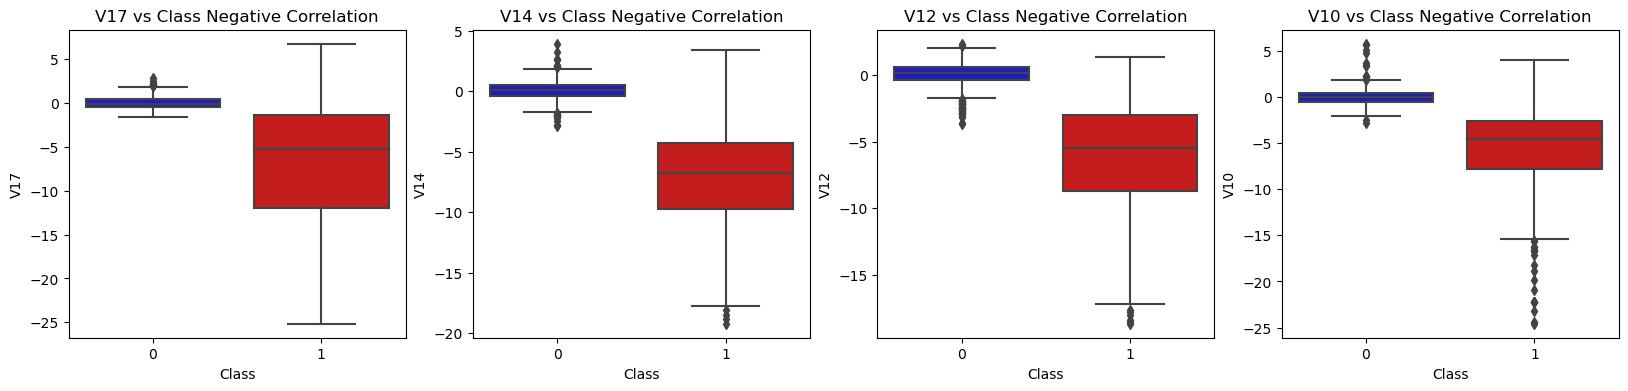

In [18]:
# Define a color palette manually or use a default palette provided by Seaborn
colors = ["#0101DE", "#DF0101"]

# Create subplots with 4 columns for displaying boxplots
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Boxplot showing negative correlations with the Class (fraud)
# V17 vs Class Negative Correlation
sns.boxplot(x="Class", y="V17", data=new_ccf, palette=colors, ax=axes[0])
# Set title for the first subplot
axes[0].set_title('V17 vs Class Negative Correlation')

# V14 vs Class Negative Correlation
sns.boxplot(x="Class", y="V14", data=new_ccf, palette=colors, ax=axes[1])
# Set title for the second subplot
axes[1].set_title('V14 vs Class Negative Correlation')

# V12 vs Class Negative Correlation
sns.boxplot(x="Class", y="V12", data=new_ccf, palette=colors, ax=axes[2])
# Set title for the third subplot
axes[2].set_title('V12 vs Class Negative Correlation')

# V10 vs Class Negative Correlation
sns.boxplot(x="Class", y="V10", data=new_ccf, palette=colors, ax=axes[3])
# Set title for the fourth subplot
axes[3].set_title('V10 vs Class Negative Correlation')

# Display the subplots
plt.show()



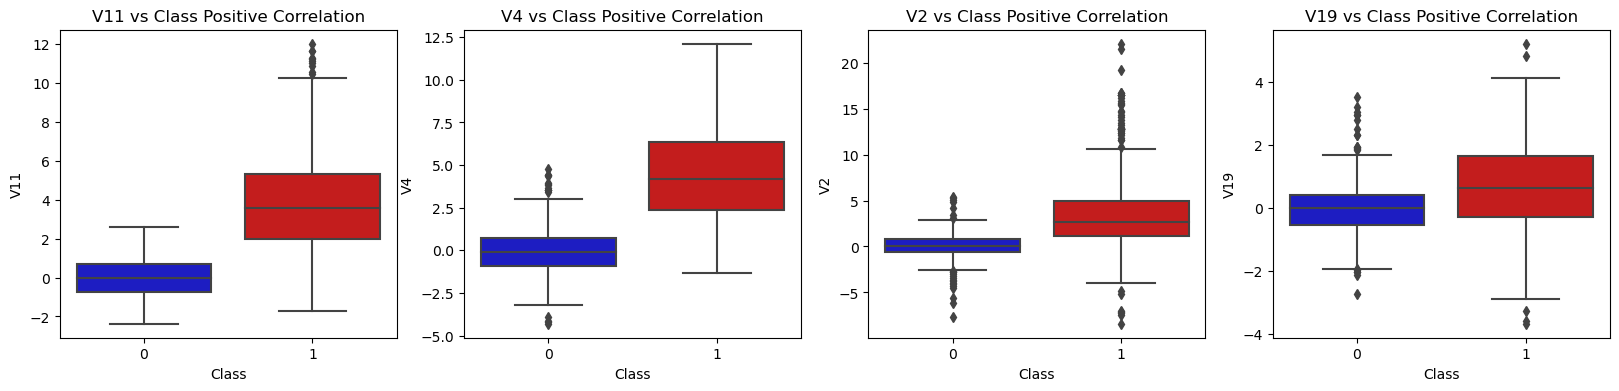

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_ccf, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_ccf, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_ccf, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_ccf, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

#### Anomaly Detection:
Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


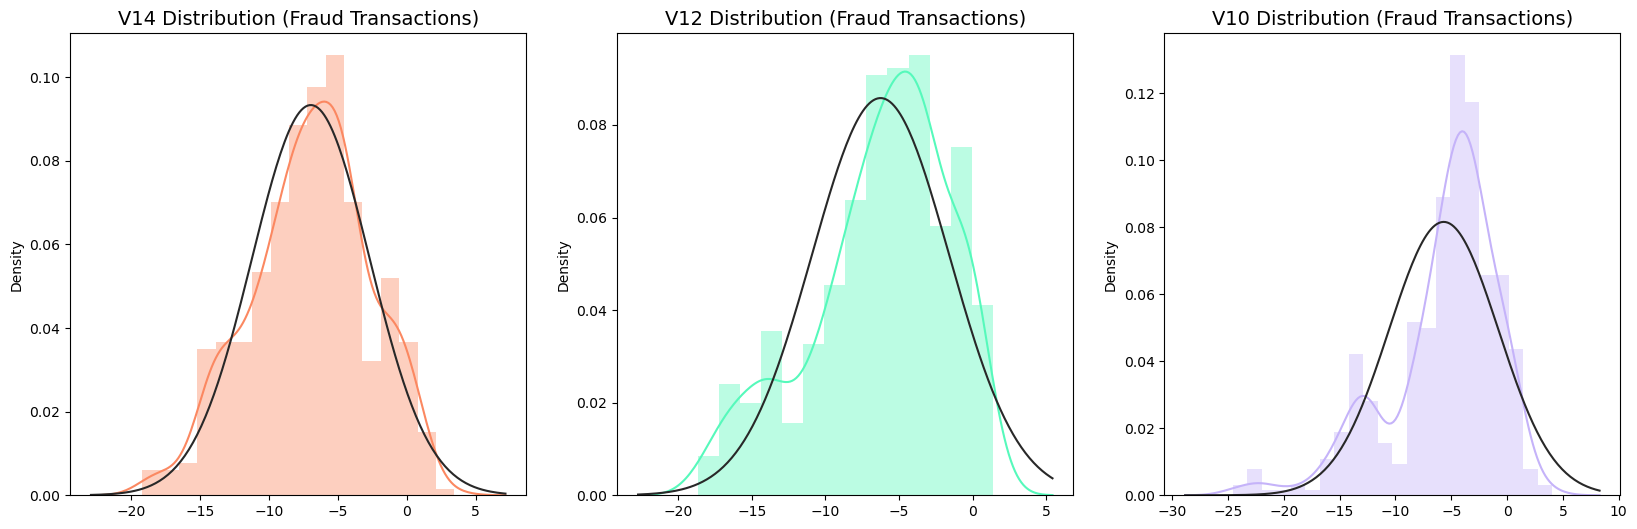

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Create subplots with 1 row and 3 columns
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the distribution of V14 for fraud transactions
v14_fraud_dist = new_ccf['V14'].loc[new_ccf['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution (Fraud Transactions)', fontsize=14)

# Plot the distribution of V12 for fraud transactions
v12_fraud_dist = new_ccf['V12'].loc[new_ccf['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution (Fraud Transactions)', fontsize=14)

# Plot the distribution of V10 for fraud transactions
v10_fraud_dist = new_ccf['V10'].loc[new_ccf['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution (Fraud Transactions)', fontsize=14)

# Show the plots
plt.show()


In [21]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)
# Get the values of V14 for fraud transactions
v14_fraud = new_ccf['V14'].loc[new_ccf['Class'] == 1].values
# Calculate the 25th and 75th percentile of V14 for fraud transactions
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
# Calculate the interquartile range (IQR) of V14 for fraud transactions
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))
# Set the cutoff value for detecting outliers based on the IQR
v14_cut_off = v14_iqr * 1.5
# Calculate the lower and upper bounds for outliers
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))
# Identify outliers for V14
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))
# Drop the rows containing outliers for V14 from the dataframe
new_ccf = new_ccf.drop(new_ccf[(new_ccf['V14'] > v14_upper) | (new_ccf['V14'] < v14_lower)].index)
print('----' * 44)

# V12 Removing Outliers
# Get the values of V12 for fraud transactions
v12_fraud = new_ccf['V12'].loc[new_ccf['Class'] == 1].values
# Calculate the 25th and 75th percentile of V12 for fraud transactions
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
# Calculate the interquartile range (IQR) of V12 for fraud transactions
v12_iqr = q75 - q25
# Set the cutoff value for detecting outliers based on the IQR
v12_cut_off = v12_iqr * 1.5
# Calculate the lower and upper bounds for outliers
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
# Identify outliers for V12
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
# Drop the rows containing outliers for V12 from the dataframe
new_ccf = new_ccf.drop(new_ccf[(new_ccf['V12'] > v12_upper) | (new_ccf['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_ccf)))
print('----' * 44)

# V10 Removing Outliers
# Get the values of V10 for fraud transactions
v10_fraud = new_ccf['V10'].loc[new_ccf['Class'] == 1].values
# Calculate the 25th and 75th percentile of V10 for fraud transactions
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
# Calculate the interquartile range (IQR) of V10 for fraud transactions
v10_iqr = q75 - q25
# Set the cutoff value for detecting outliers based on the IQR
v10_cut_off = v10_iqr * 1.5
# Calculate the lower and upper bounds for outliers
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
# Identify outliers for V10
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
# Drop the rows containing outliers for V10 from the dataframe
new_ccf = new_ccf.drop(new_ccf[(new_ccf['V10'] > v10_upper) | (new_ccf['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_ccf)))


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.4937733551053, -18.8220867423816, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.5536970096458, -18.4311310279993, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.3460988468775, -22.187088

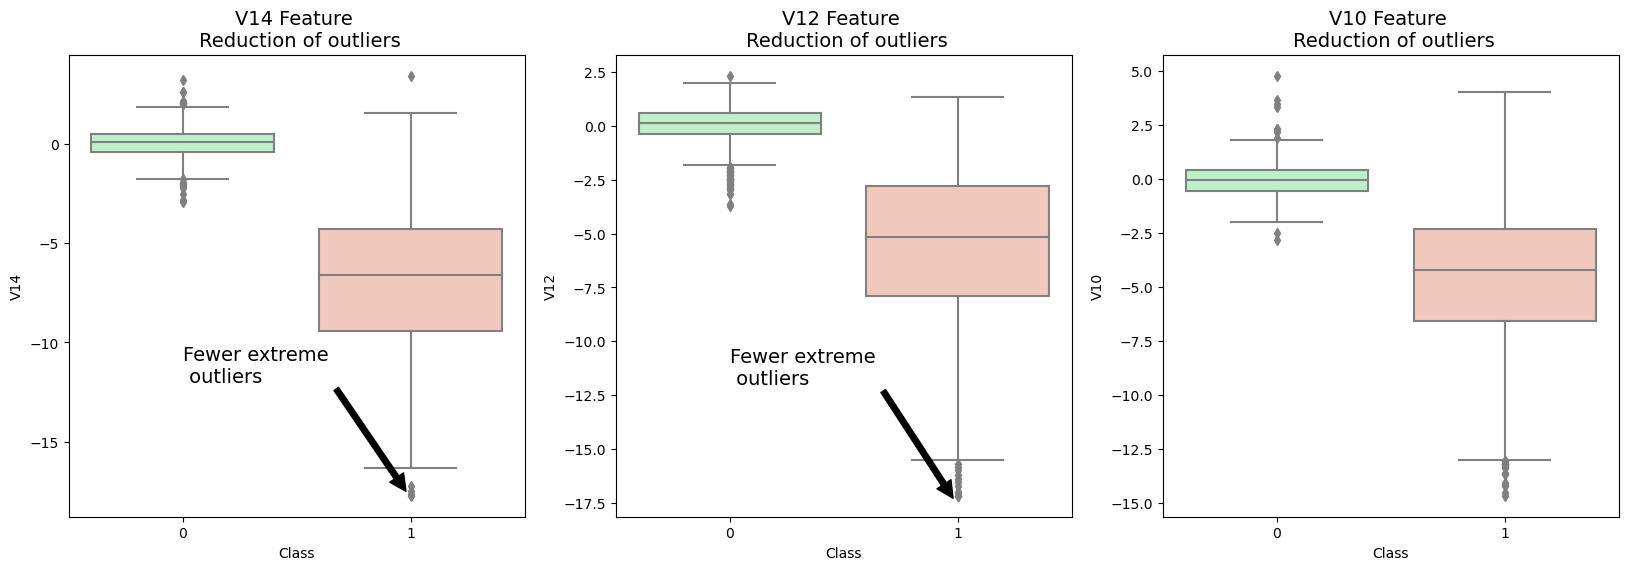

In [22]:
# Create subplots for visual comparison of the distribution of features V14, V12, and V10
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Define colors for the boxplots
colors = ['#B3F9C5', '#f9c5b3']

# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_ccf, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
# Annotation to highlight the reduction of outliers
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V12
sns.boxplot(x="Class", y="V12", data=new_ccf, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
# Annotation to highlight the reduction of outliers
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_ccf, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
# Annotation to highlight the reduction of outliers
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Show the plots
plt.show()


#### Dimensionality Reduction and Clustering:

In [23]:
# New_ccf is from the random undersample data (fewer instances)
# Splitting the dataset into features (X) and target variable (y)
X = new_ccf.drop('Class', axis=1)
y = new_ccf['Class']

# T-SNE Implementation
# Measure the time taken for T-SNE dimensionality reduction
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
# Measure the time taken for PCA dimensionality reduction
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
# Measure the time taken for TruncatedSVD dimensionality reduction
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 3.6 s
PCA took 0.32 s
Truncated SVD took 0.003 s


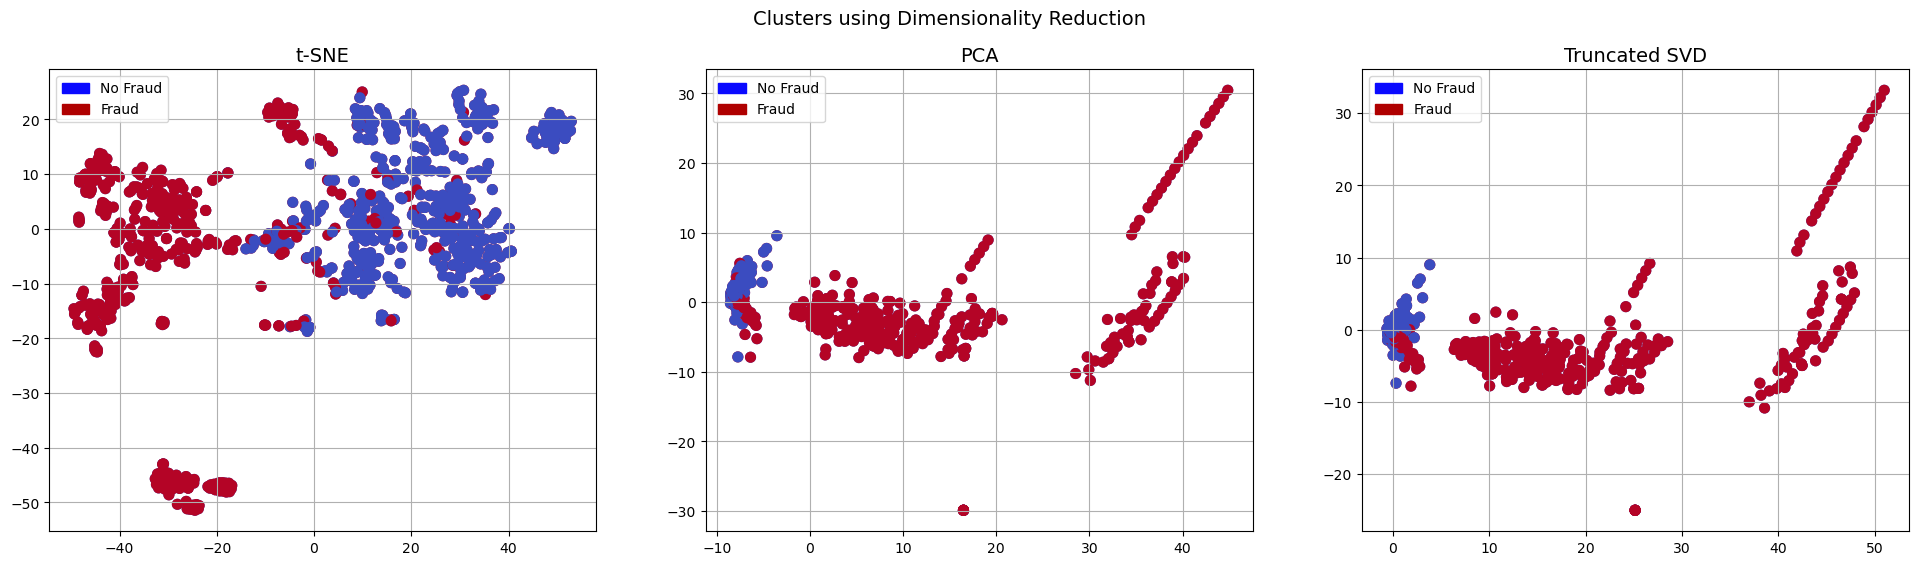

In [24]:
# Create subplots for the scatter plots of dimensionality reduction
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# Set the title for the entire figure
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# Define legend patches for colors
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

# Display the plot
plt.show()


#### Classifiers (UnderSampling):
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

In [25]:
# Splitting the dataset into features (X) and target variable (y)
# X contains all the features except the 'Class' column
X = new_ccf.drop('Class', axis=1)
# y contains only the 'Class' column, which represents the target variable
y = new_ccf['Class']


In [26]:
# Importing the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# This step is explicitly used for undersampling.
# Splitting the dataset into training and testing sets with a 80-20 ratio and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Convert the data into arrays for feeding into classification algorithms
X_train = X_train.values  # Convert training features to array
X_test = X_test.values    # Convert testing features to array
y_train = y_train.values  # Convert training labels to array
y_test = y_test.values    # Convert testing labels to array


In [28]:
# Define a dictionary containing the classifiers to be implemented
classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Logistic Regression classifier
    "KNearest": KNeighborsClassifier(),           # K-Nearest Neighbors classifier
    "Support Vector Classifier": SVC(),           # Support Vector Classifier
    "DecisionTreeClassifier": DecisionTreeClassifier()  # Decision Tree Classifier
}


In [29]:
# Import the necessary library for cross-validation
from sklearn.model_selection import cross_val_score

# Iterate through each classifier in the dictionary and evaluate its performance
for key, classifier in classifiers.items():
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)
    # Perform cross-validation and calculate the training score
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    # Print the classifier name and its training score
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


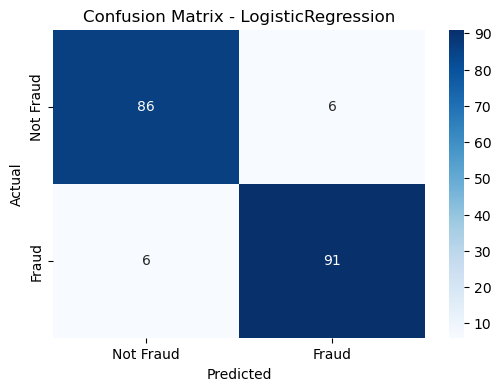

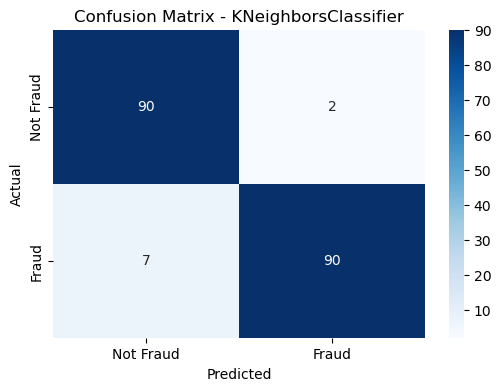

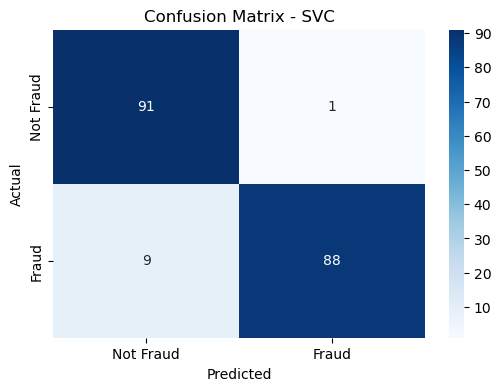

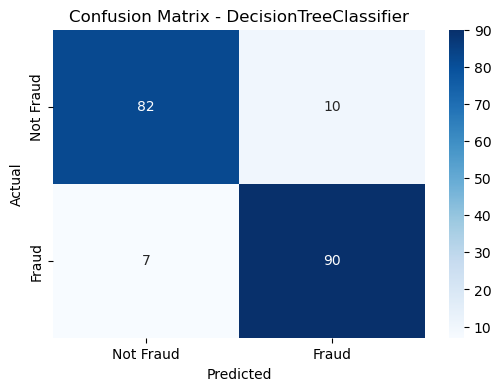

In [30]:
# Import necessary libraries for generating confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each classifier in the dictionary
for key, classifier in classifiers.items():
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)
    # Predict labels using the classifier on the test data
    y_pred = classifier.predict(X_test)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))  # Set the figure size
    # Create heatmap of confusion matrix with annotations and color mapping
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f"Confusion Matrix - {classifier.__class__.__name__}")  # Set title of the plot
    plt.xlabel('Predicted')  # Set label for x-axis
    plt.ylabel('Actual')  # Set label for y-axis
    plt.show()  # Display the plot


In [31]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga']}

# Perform GridSearchCV for Logistic Regression
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Get the best estimator of logistic regression
log_reg = grid_log_reg.best_estimator_

# Define the parameter grid for K-Nearest Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Perform GridSearchCV for K-Nearest Neighbors
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# Get the best estimator of K-Nearest Neighbors
knears_neighbors = grid_knears.best_estimator_

# Define the parameter grid for Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# Perform GridSearchCV for Support Vector Classifier
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# Get the best estimator of Support Vector Classifier
svc = grid_svc.best_estimator_

# Define the parameter grid for Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
# Perform GridSearchCV for Decision Tree Classifier
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# Get the best estimator of Decision Tree Classifier
tree_clf = grid_tree.best_estimator_


In [32]:
# Import necessary library for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid for logistic regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga']}

# Perform GridSearchCV for Logistic Regression
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Get the best estimator of logistic regression
log_reg = grid_log_reg.best_estimator_

# Define parameter grid for K-Nearest Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Perform GridSearchCV for K-Nearest Neighbors
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# Get the best estimator of K-Nearest Neighbors
knears_neighbors = grid_knears.best_estimator_

# Define parameter grid for Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# Perform GridSearchCV for Support Vector Classifier
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# Get the best estimator of Support Vector Classifier
svc = grid_svc.best_estimator_

# Define parameter grid for Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
# Perform GridSearchCV for Decision Tree Classifier
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# Get the best estimator of Decision Tree Classifier
tree_clf = grid_tree.best_estimator_


In [33]:
# Calculate cross-validation scores for each classifier to check for overfitting

# Logistic Regression
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

# K-Nearest Neighbors
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

# Support Vector Classifier
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

# Decision Tree Classifier
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.44%
Knears Neighbors Cross Validation Score 92.85%
Support Vector Classifier Cross Validation Score 94.57%
DecisionTree Classifier Cross Validation Score 91.53%


In [34]:
# We will undersample during cross validating
undersample_X = ccf.drop('Class', axis=1)
undersample_y = ccf['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
from imblearn.under_sampling import NearMiss
from collections import Counter

nearmiss = NearMiss()
X_nearmiss, y_nearmiss = nearmiss.fit_resample(undersample_X, undersample_y)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))


Train: [ 56962  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 56961]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56962  56963  56964 ... 113925 113926 113927]
Train: [     0      1      2 ... 284804 284805 284806] Test: [109219 110727 111261 ... 172973 173203 173761]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170876 170877 170878 ... 231318 232029 232237]
Train: [     0      1      2 ... 231318 232029 232237] Test: [227835 227836 227837 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [35]:
# Import necessary libraries
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves for four different estimators
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    # Create subplots for each estimator
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    
    # Set the y-limit if specified
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Plot learning curves for the first estimator (Logistic Regression)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Plot learning curves for the second estimator (K-nearest Neighbors)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K-nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Plot learning curves for the third estimator (Support Vector Classifier)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Plot learning curves for the fourth estimator (Decision Tree Classifier)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    # Return the plot
    return plt


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

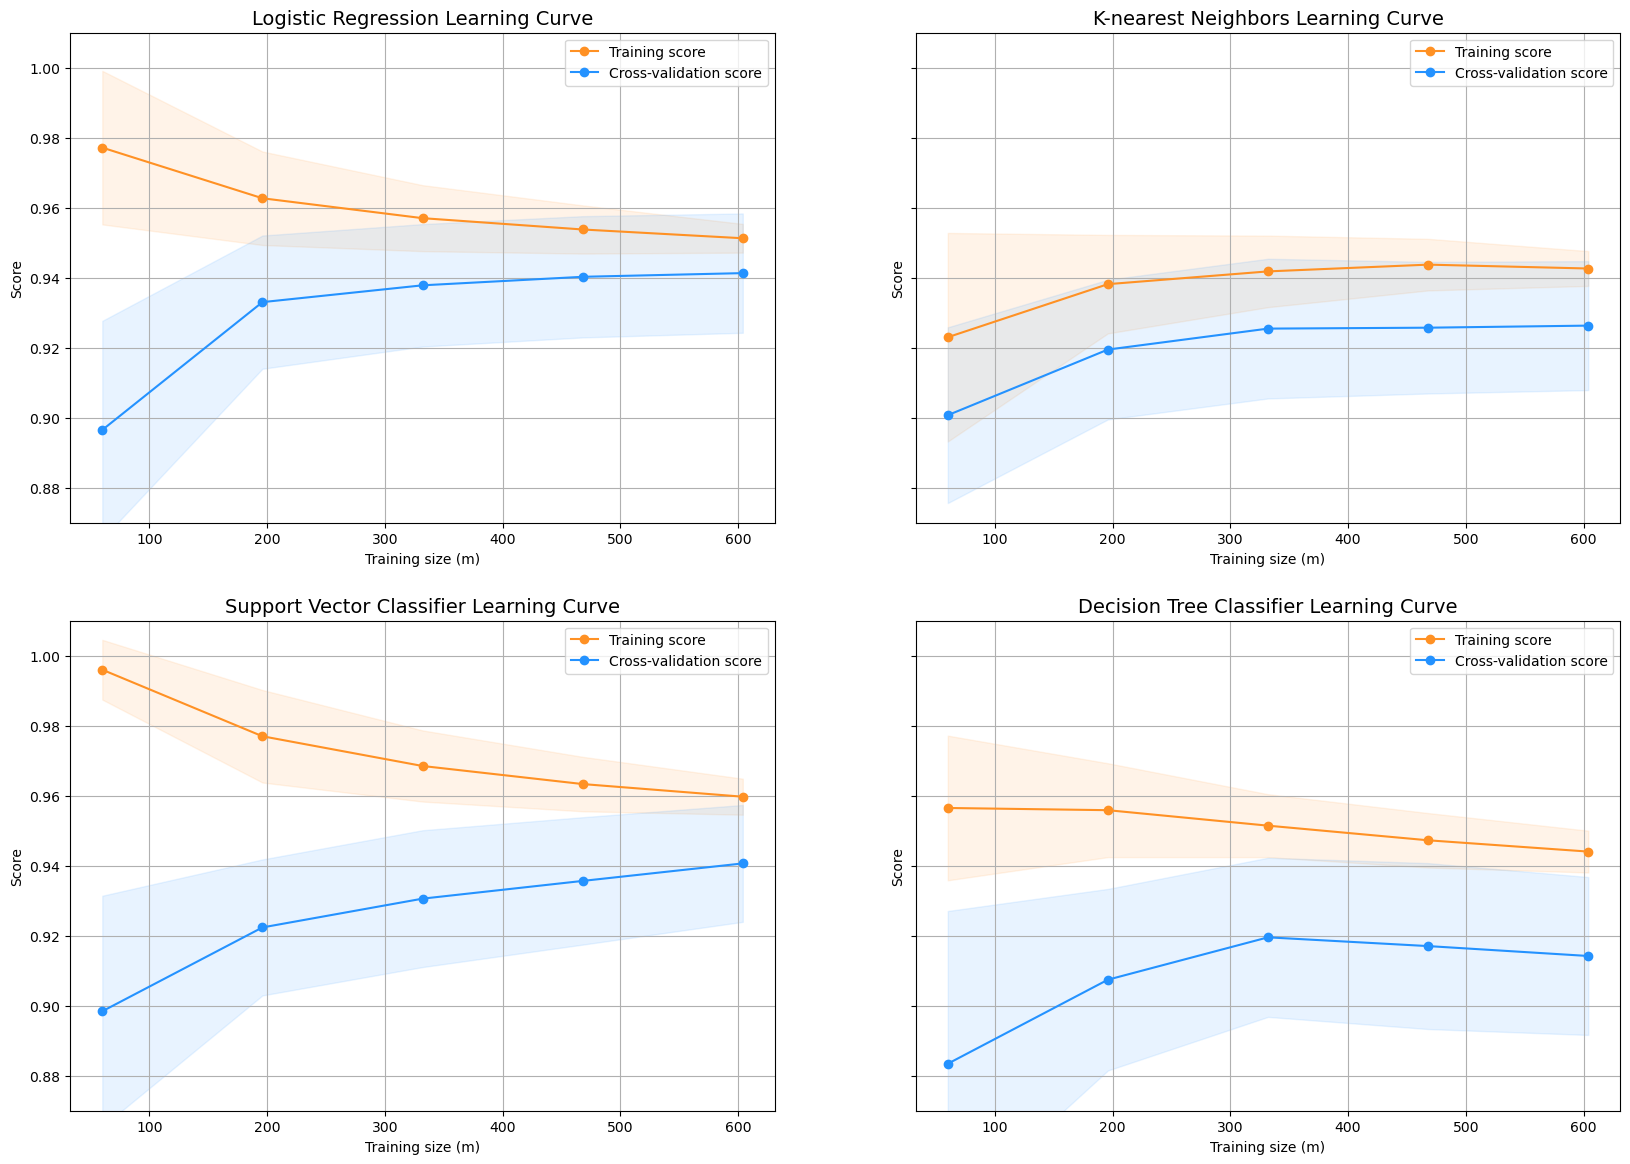

In [36]:
# Import the necessary library
from sklearn.model_selection import ShuffleSplit

# Define a ShuffleSplit cross-validation strategy with 100 splits and a test size of 20%
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

# Call the plot_learning_curve function to plot the learning curves for the specified estimators
# Pass the Logistic Regression, K-nearest Neighbors, Support Vector Classifier, and Decision Tree Classifier estimators,
# the training data (X_train, y_train), the desired y-limit for the plots, the cross-validation strategy (cv),
# and the number of CPU cores to use (n_jobs)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)


In [37]:
# Import the necessary libraries
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Generate predictions for each classifier using cross-validation
# Logistic Regression predictions using decision function
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

# K-nearest Neighbors predictions
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

# Support Vector Classifier predictions using decision function
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

# Decision Tree Classifier predictions
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)


In [38]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9767045454545454
KNears Neighbors:  0.9256313131313131
Support Vector Classifier:  0.9761644219977554
Decision Tree Classifier:  0.9150252525252526


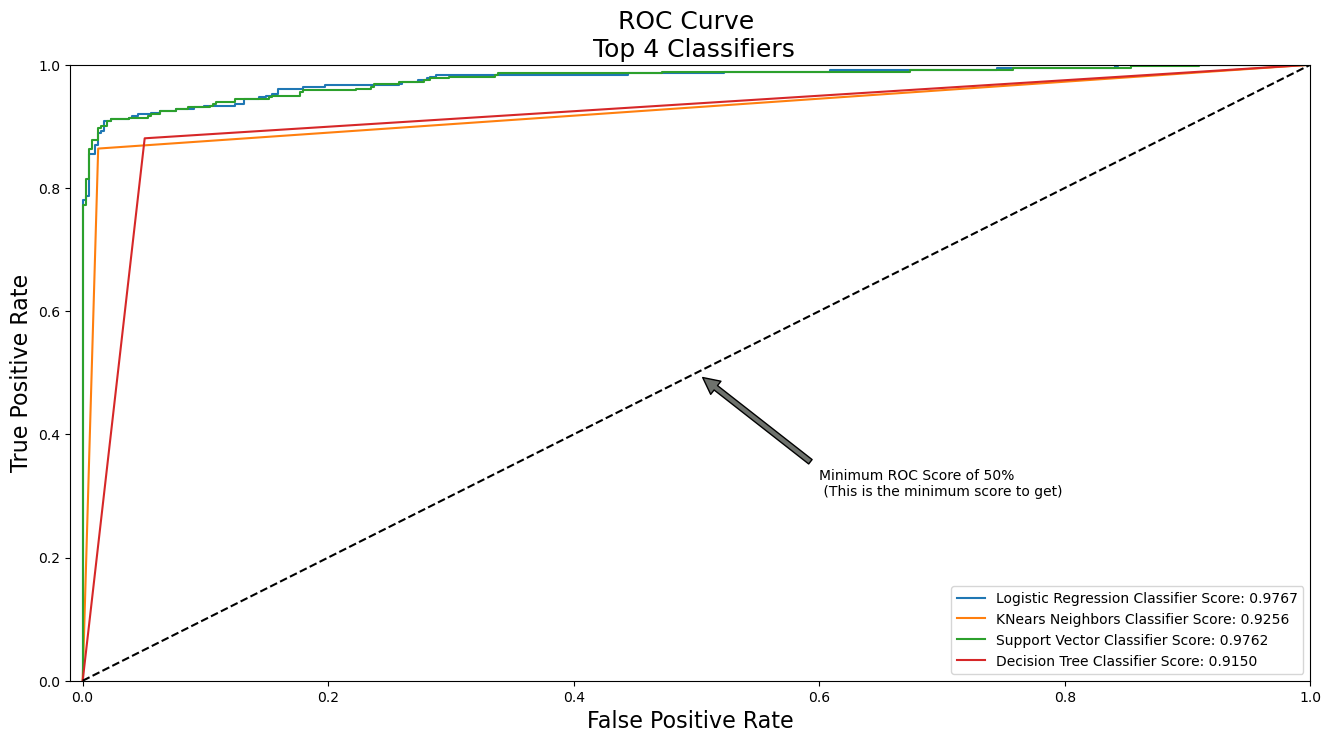

In [39]:
# Compute ROC curves for each classifier
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

# Define a function to plot ROC curves for multiple classifiers
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    
    # Plot ROC curves and label each classifier with its AUC score
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    
    # Plot the diagonal line representing random guessing
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Set plot limits and labels
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    # Annotate the plot with information about the minimum ROC score
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    
    # Add legend to the plot
    plt.legend()

# Call the function to plot ROC curves for multiple classifiers
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

# Show the plot
plt.show()


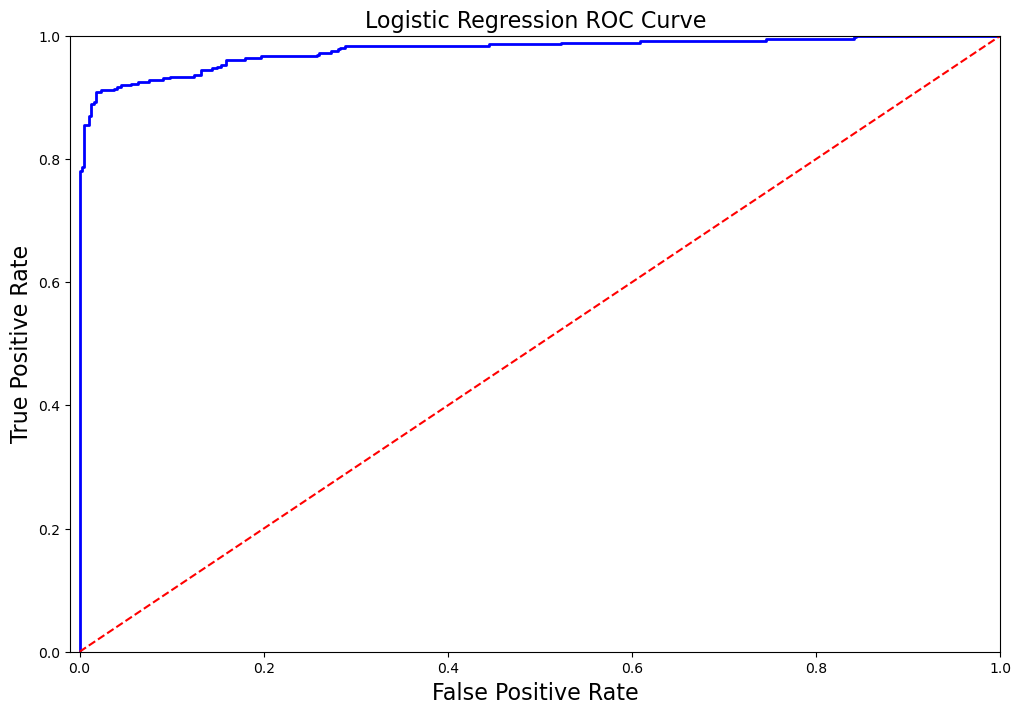

In [40]:
#A Deeper Look into LogisticRegression:
# Define a function to plot the ROC curve for Logistic Regression
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    
    # Plot the ROC curve for Logistic Regression
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    
    # Plot the diagonal line representing random guessing
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Set labels for x and y axes
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    # Set limits for x and y axes
    plt.axis([-0.01,1,0,1])

# Call the function to plot the ROC curve for Logistic Regression
logistic_roc_curve(log_fpr, log_tpr)

# Show the plot
plt.show()


In [41]:
# Import the required library for computing precision-recall curve
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and threshold values for the given predictions from Logistic Regression
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)


In [42]:
# Import necessary evaluation metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Make predictions using the Logistic Regression model on the training data
y_pred = log_reg.predict(X_train)

# Print out evaluation metrics for the overfitting case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# Print out evaluation metrics for how it should ideally be
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.92
Precision Score: 0.73
F1 Score: 0.81
Accuracy Score: 0.80
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.66
Precision Score: 0.00
Recall Score: 0.37
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [43]:
# Compute the decision function scores for the test data using the Logistic Regression model
undersample_y_score = log_reg.decision_function(original_Xtest)


In [44]:
from sklearn.metrics import average_precision_score
# Compute the average precision-recall score using the actual labels and the decision function scores
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

# Print the average precision-recall score
print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))


Average precision-recall score: 0.04


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.04')

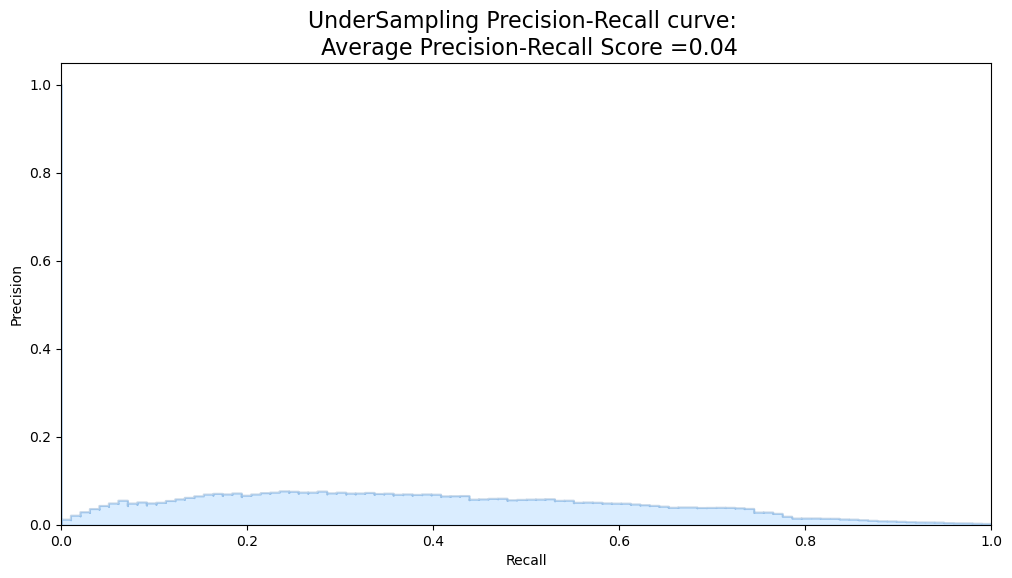

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Create a figure for plotting
fig = plt.figure(figsize=(12,6))

# Compute precision and recall values using the precision_recall_curve function
precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

# Plot the precision-recall curve
plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)


#### SMOTE Technique (Over-Sampling):

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Initialize Stratified K-Fold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Lists to store evaluation metrics
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier parameters
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize Logistic Regression
log_reg = LogisticRegression()

# Initialize RandomizedSearchCV for logistic regression
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Iterate over Stratified K-Fold splits
for train_index, test_index in sss.split(original_Xtrain, original_ytrain):
    # Split data into train and test sets
    X_train_fold, X_test_fold = original_Xtrain[train_index], original_Xtrain[test_index]
    y_train_fold, y_test_fold = original_ytrain[train_index], original_ytrain[test_index]
    
    # Apply SMOTE to the training data
    smote = SMOTE(sampling_strategy='minority')
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Train the model using RandomizedSearchCV
    rand_log_reg.fit(X_train_resampled, y_train_resampled)
    best_est = rand_log_reg.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_est.predict(X_test_fold)
    
    # Calculate evaluation metrics
    accuracy_lst.append(accuracy_score(y_test_fold, y_pred))
    precision_lst.append(precision_score(y_test_fold, y_pred))
    recall_lst.append(recall_score(y_test_fold, y_pred))
    f1_lst.append(f1_score(y_test_fold, y_pred))
    auc_lst.append(roc_auc_score(y_test_fold, y_pred))

# Print the average evaluation metrics
print('---' * 45)
print('')
print("Accuracy: {}".format(np.mean(accuracy_lst)))
print("Precision: {}".format(np.mean(precision_lst)))
print("Recall: {}".format(np.mean(recall_lst)))
print("F1 Score: {}".format(np.mean(f1_lst)))
print("AUC Score: {}".format(np.mean(auc_lst)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

Accuracy: 0.970761119152621
Precision: 0.0646182942020396
Recall: 0.9137617656604998
F1 Score: 0.11963981168611397
AUC Score: 0.9423108436622473
---------------------------------------------------------------------------------------------------------------------------------------


In [47]:
from sklearn.metrics import classification_report

# Define the class labels
labels = ['No Fraud', 'Fraud']

# Make predictions on the test set using the best estimator
smote_prediction = best_est.predict(original_Xtest)

# Generate the classification report
report = classification_report(original_ytest, smote_prediction, target_names=labels)

# Print the classification report
print(report)


              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [48]:
# Compute the decision function scores for the test set using the best estimator
y_score = best_est.decision_function(original_Xtest)


In [49]:
from sklearn.metrics import average_precision_score

# Calculate the average precision-recall score
average_precision = average_precision_score(original_ytest, y_score)

# Print the average precision-recall score
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.70


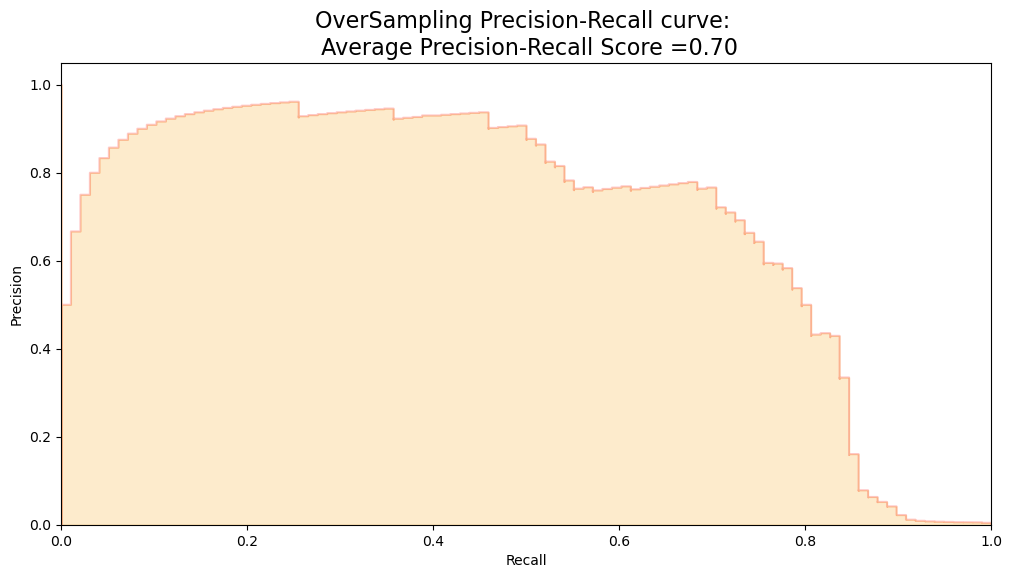

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Create a figure
fig = plt.figure(figsize=(12,6))

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(original_ytest, y_score)

# Plot the precision-recall curve
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

# Show the plot
plt.show()


In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [52]:
# Logistic Regression fitted using SMOTE technique
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :7.470187664031982 sec


In [53]:
# Predictions
y_pred_log_reg = log_reg_sm.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


In [54]:
# Confusion matrices
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

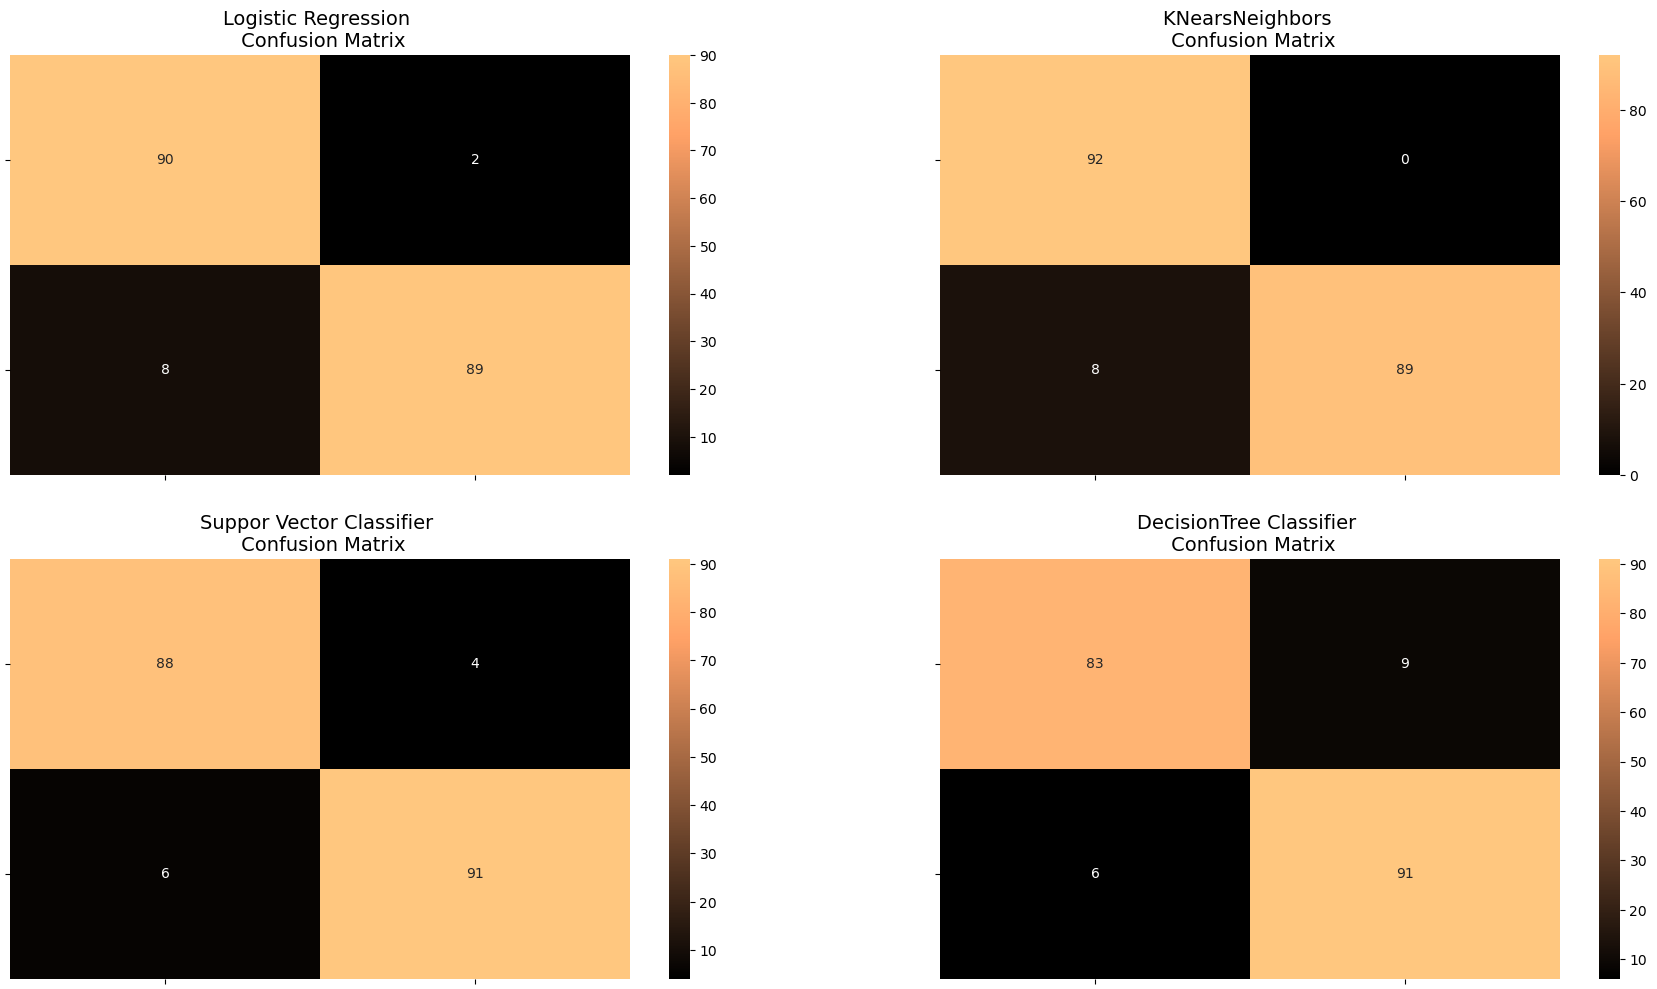

In [55]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [56]:
from sklearn.metrics import classification_report

# Classification reports for each classifier
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.98      0.92      0.95        97

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        92
           1       1.00      0.92      0.96        97

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted avg       0.96      0.96      0.96       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        92
           1       0.96      0.94      0.95        97

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted

#### Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):
In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions.

In [57]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Fit the Logistic Regression model with Under-Sampling
log_reg.fit(X_train, y_train)
y_pred_undersample = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred_undersample)

# Fit the Logistic Regression model with SMOTE Technique
best_est.fit(Xsm_train, ysm_train)
y_pred_oversample = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_oversample)

# Create a DataFrame to display the scores
data = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_scores_df = pd.DataFrame(data)

# Reorder the columns
final_scores_df = final_scores_df[['Technique', 'Score']]

# Display the final scores DataFrame
print(final_scores_df)



              Technique     Score
0  Random UnderSampling  0.936508
1  Oversampling (SMOTE)  0.987307


In [58]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Determine the number of input features
n_inputs = X_train.shape[1]

In [61]:
# Define the architecture of the neural network model
undersample_model = Sequential([
    Dense(32, input_shape=(n_inputs,), activation='relu'),  # Input layer with appropriate input shape
    Dense(32, activation='relu'),                           # Hidden layer
    Dense(2, activation='softmax')                          # Output layer with softmax activation for binary classification
])

In [62]:
# Print the summary of the model architecture
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,114 (8.26 KB)

 Trainable params: 2,114 (8.26 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Compile the model with optimizer, loss function, and evaluation metrics
undersample_model.compile(optimizer=Adam(learning_rate=0.001), 
                          loss='sparse_categorical_crossentropy',  # Using sparse categorical crossentropy for binary classification
                          metrics=['accuracy'])

# Train the model on the undersampled training data
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)



Epoch 1/20
25/25 - 1s - 54ms/step - accuracy: 0.6424 - loss: 0.8086 - val_accuracy: 0.7632 - val_loss: 0.4566
Epoch 2/20
25/25 - 0s - 5ms/step - accuracy: 0.8295 - loss: 0.3694 - val_accuracy: 0.8882 - val_loss: 0.3235
Epoch 3/20
25/25 - 0s - 7ms/step - accuracy: 0.8891 - loss: 0.2919 - val_accuracy: 0.9079 - val_loss: 0.2590
Epoch 4/20
25/25 - 0s - 3ms/step - accuracy: 0.9040 - loss: 0.2498 - val_accuracy: 0.9145 - val_loss: 0.2245
Epoch 5/20
25/25 - 0s - 3ms/step - accuracy: 0.9238 - loss: 0.2199 - val_accuracy: 0.9145 - val_loss: 0.2004
Epoch 6/20
25/25 - 0s - 3ms/step - accuracy: 0.9305 - loss: 0.1964 - val_accuracy: 0.9276 - val_loss: 0.1854
Epoch 7/20
25/25 - 0s - 3ms/step - accuracy: 0.9354 - loss: 0.1776 - val_accuracy: 0.9342 - val_loss: 0.1679
Epoch 8/20
25/25 - 0s - 3ms/step - accuracy: 0.9437 - loss: 0.1627 - val_accuracy: 0.9342 - val_loss: 0.1544
Epoch 9/20
25/25 - 0s - 3ms/step - accuracy: 0.9437 - loss: 0.1513 - val_accuracy: 0.9342 - val_loss: 0.1457
Epoch 10/20
25/25 

In [64]:
# Make predictions on the original test set
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

# Make predictions on the original test set for fraud detection
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions_classes = np.argmax(undersample_fraud_predictions, axis=1)

In [65]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Convert predicted probabilities to binary predictions
undersample_fraud_predictions_classes = np.argmax(undersample_fraud_predictions, axis=1)



In [66]:
# Confusion matrix for the undersampled predictions
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions_classes)
# Confusion matrix for actual labels (100% accuracy)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

# Plotting confusion matrices
fig = plt.figure(figsize=(16,8))



<Figure size 1600x800 with 0 Axes>

Confusion matrix, without normalization
[[55626  1237]
 [    8    90]]


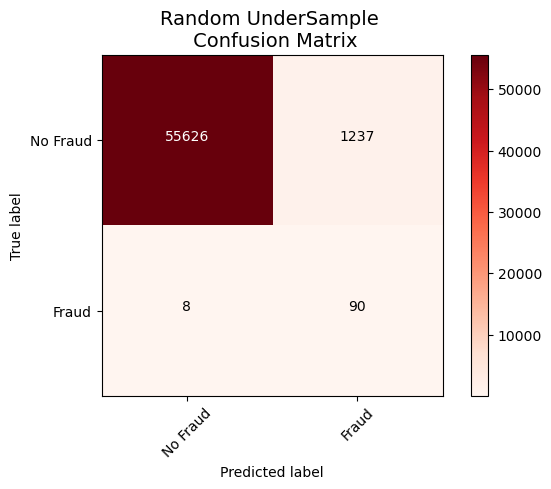

In [67]:
# Plotting the confusion matrix for undersampled predictions
fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)


Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


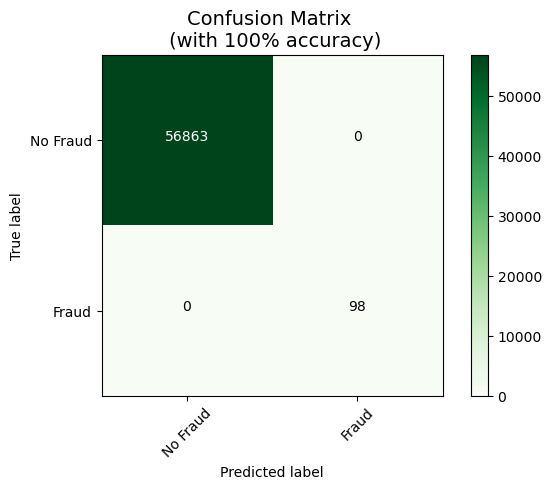

In [68]:

# Plotting the confusion matrix for actual labels
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

# Define the number of input features for oversampling model
n_inputs = Xsm_train.shape[1]

# Define the architecture of the oversampling model
oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),  # Input layer with appropriate input shape
    Dense(32, activation='relu'),                                 # Hidden layer
    Dense(2, activation='softmax')                                # Output layer with softmax activation for binary classification
])


In [69]:
# Compile the oversample_model
oversample_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [70]:
# Train the oversample_model
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)



Epoch 1/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9748 - loss: 0.0656 - val_accuracy: 0.9957 - val_loss: 0.0203
Epoch 2/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9966 - loss: 0.0147 - val_accuracy: 0.9997 - val_loss: 0.0072
Epoch 3/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9985 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 4/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9996 - val_loss: 0.0030
Epoch 6/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 8.2837e-04
Epoch 7/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 8/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 9/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.999

In [71]:
# Generate predictions using the oversample_model
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)




In [72]:
# Convert predicted probabilities to binary predictions for fraud
oversample_fraud_predictions = np.argmax(oversample_model.predict(original_Xtest, batch_size=200, verbose=0), axis=1)


In [73]:


# Compute the confusion matrix for oversampled predictions
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)



In [74]:
# Compute the confusion matrix for actual labels (100% accuracy)
actual_cm = confusion_matrix(original_ytest, original_ytest)



In [75]:
# Define labels for the confusion matrix
labels = ['No Fraud', 'Fraud']

# Plot the confusion matrices
fig = plt.figure(figsize=(16,8))



<Figure size 1600x800 with 0 Axes>

Confusion matrix, without normalization
[[56857     6]
 [   31    67]]


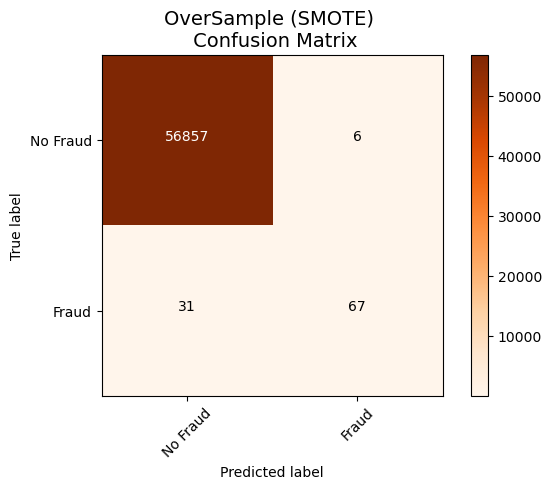

In [76]:
# Plot the confusion matrix for oversampled predictions
fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)



Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


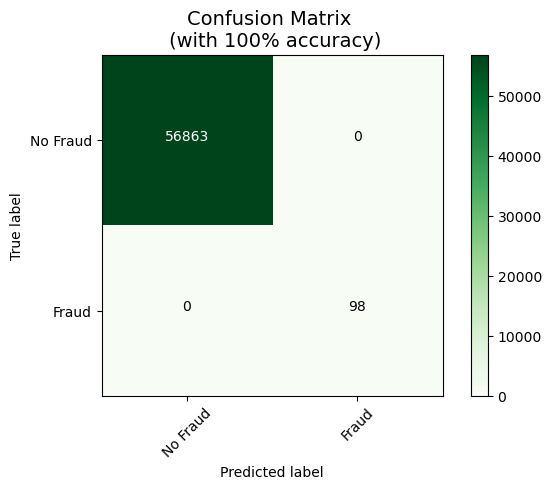

In [77]:
# Plot the confusion matrix for actual labels
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)
